In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import zipfile
with zipfile.ZipFile("AnalyticsOlympiad2022Data.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [3]:
train_df = pd.read_csv('/content/targetdir/AnalyticsOlympiad2022Data/train.csv')
test_df = pd.read_csv('/content/targetdir/AnalyticsOlympiad2022Data/test.csv')
combine = [train_df, test_df]

In [ ]:
print(train_df.columns.values)

['ID' 'AGE' 'GENDER' 'DRIVING_EXPERIENCE' 'EDUCATION' 'INCOME'
 'CREDIT_SCORE' 'VEHICLE_OWNERSHIP' 'VEHICLE_YEAR' 'MARRIED' 'CHILDREN'
 'POSTAL_CODE' 'ANNUAL_MILEAGE' 'SPEEDING_VIOLATIONS' 'DUIS'
 'PAST_ACCIDENTS' 'OUTCOME' 'TYPE_OF_VEHICLE']


In [ ]:
print(train_df.info)

<bound method DataFrame.info of             ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0       816393  40-64  female             20-29y   university   middle class   
1       251762  26-39    male             20-29y  high school   middle class   
2       481952  40-64    male             20-29y         none   middle class   
3         3506  40-64    male             20-29y  high school    upper class   
4       498013  40-64  female             20-29y         none  working class   
...        ...    ...     ...                ...          ...            ...   
104995   19557    65+  female               0-9y  high school    upper class   
104996  222459  40-64  female               0-9y         none  working class   
104997   83089  16-25    male             10-19y         none    upper class   
104998  984879  40-64  female             20-29y  high school  working class   
104999  139618    65+  female             20-29y  high school    upper class   

       

In [ ]:
print(test_df.info)

<bound method DataFrame.info of            ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0      352928  40-64    male             10-19y         none  working class   
1       38579  26-39  female             20-29y  high school    upper class   
2      504022  40-64    male             10-19y         none    upper class   
3      202404  26-39    male             20-29y  high school    upper class   
4      527913    65+    male             10-19y         none   middle class   
...       ...    ...     ...                ...          ...            ...   
44995  117683    65+  female             20-29y  high school        poverty   
44996  619620  40-64    male             20-29y   university  working class   
44997   11086  40-64    male             10-19y         none        poverty   
44998   31717    65+    male               30y+  high school    upper class   
44999   26945    65+  female             10-19y  high school    upper class   

       CREDIT_SCORE

In [ ]:
train_df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [ ]:
train_df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000
mean,394931.295905,0.602173,0.827038,0.584143,0.520000,18045.439267,11061.228571,0.675676,0.129733,0.549314,0.422648
std,279694.106053,0.138045,0.378216,0.492871,0.499602,16709.040449,2972.355482,1.383678,0.589714,1.402809,0.493983
min,101.000000,0.066880,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,156351.750000,0.514876,1.000000,0.000000,0.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.000000
50%,354679.500000,0.601112,1.000000,1.000000,1.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,0.000000
75%,598602.250000,0.703216,1.000000,1.000000,1.000000,22957.750000,13000.000000,1.000000,0.000000,0.000000,1.000000
max,999976.000000,0.954075,1.000000,1.000000,1.000000,92101.000000,21000.000000,20.000000,6.000000,15.000000,1.000000


In [ ]:
train_df.describe(include=['O']) # for categorical 

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,TYPE_OF_VEHICLE
count,105000,105000,105000,105000,105000,105000,105000
unique,4,2,4,3,4,2,4
top,40-64,male,20-29y,high school,upper class,before 2015,Sports Car
freq,33716,65317,37493,46590,51271,57511,34592


In [ ]:
!pip uninstall pandas_profiling

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 5.2 MB/s 
     |████████████████████████████████| 690 kB 44.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 54.8 MB/s 
     |████████████████████████████████| 9.9 MB 52.5 MB/s 
     |████████████████████████████████| 4.7 MB 34.1 MB/s 
     |████████████████████████████████| 296 kB 66.5 MB/s 
     |████████████████████████████████| 1.6 MB 43.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=dda74202152fe50ba9e12178a91854e7710803c55af7586c22b8c4132012fbb4
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstall

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [ ]:
profile = ProfileReport(train_df, title="vechile insurance Dataset", html={'style': {'full_width': True}}, sort=None)
profile.to_file("your_report.html")

In [ ]:
# profile.to_notebook_iframe() for inserting html in this notebook

In [4]:
for dataset in combine:
  dataset = dataset.drop('ID', axis=1,inplace=True)

In [5]:
age_mapping = {"16-25": 1, "26-39": 2, "40-64": 3, "65+": 4}
for dataset in combine:
    dataset['AGE'] = dataset['AGE'].map(age_mapping)

In [6]:
gender_mapping = {"female": 1, "male": 2}
for dataset in combine:
    dataset['GENDER'] = dataset['GENDER'].map(gender_mapping)

In [7]:
drEXP_mapping = {"0-9y": 1, "10-29y": 2, "20-29y": 3, "30y+": 4}
for dataset in combine:
    dataset['DRIVING_EXPERIENCE'] = dataset['DRIVING_EXPERIENCE'].map(drEXP_mapping)

In [8]:
edu_mapping = {"none": 1, "high school": 2, "university": 3}
for dataset in combine:
    dataset['EDUCATION'] = dataset['EDUCATION'].map(edu_mapping)

In [9]:
inc_mapping = {"poverty": 1, "middle class": 2, "working class": 3, "upper class": 4}
for dataset in combine:
    dataset['INCOME'] = dataset['INCOME'].map(inc_mapping)

In [10]:
vecOWN_mapping = {1.0:1,0.0:0}
for dataset in combine:
    dataset['VEHICLE_OWNERSHIP'] = dataset['VEHICLE_OWNERSHIP'].map(vecOWN_mapping)

In [11]:
vecYR_mapping = {'before 2015':1, 'after 2015':2}
for dataset in combine:
    dataset['VEHICLE_YEAR'] = dataset['VEHICLE_YEAR'].map(vecYR_mapping)

In [12]:
MARR_mapping = {1.0:1,0.0:0}
for dataset in combine:
    dataset['MARRIED'] = dataset['MARRIED'].map(MARR_mapping)

In [13]:
CHIL_mapping = {1.0:1,0.0:0}
for dataset in combine:
    dataset['CHILDREN'] = dataset['CHILDREN'].map(CHIL_mapping)

In [14]:
#https://stackoverflow.com/questions/58101126/using-scikit-learn-onehotencoder-with-a-pandas-dataframe

train_df=pd.get_dummies(train_df,prefix=['TYPE_OF_VEHICLE'], columns= ['TYPE_OF_VEHICLE'], drop_first=True)
test_df=pd.get_dummies(test_df,prefix=['TYPE_OF_VEHICLE'], columns= ['TYPE_OF_VEHICLE'], drop_first=True)
combine=[train_df,test_df]

In [ ]:
# for data in combine:
#   print(data.head())

In [15]:
OUT_mapping = {1.0:1,0.0:0}
train_df['OUTCOME'] = train_df['OUTCOME'].map(OUT_mapping)

In [ ]:
print(train_df['POSTAL_CODE'])

0         37379
1         10238
2         10238
3         92099
4         32122
          ...  
104995    31885
104996    32277
104997    34800
104998    10238
104999    10238
Name: POSTAL_CODE, Length: 105000, dtype: int64


In [ ]:
# for data in combine:
#   for ind in range(len(data['POSTAL_CODE'])):
#     val_1=data['POSTAL_CODE'][ind]
#     val_2=data['OUTCOME'][ind]
#     for indx in range(len(data['POSTAL_CODE'])):
#       cnt1,cnt2=0,0
#       if data['POSTAL_CODE'][ind]==val_1 and data['OUTCOME'][ind]==val_2:
#         cnt1+=1
#       else:
#         cnt2+=1
#     data['POSTAL_CODE'][ind]=cnt1/(cnt1+cnt2)





In [16]:
for data in combine:
  for ind in range(len(data['POSTAL_CODE'])):
    a=data['POSTAL_CODE'][ind]
    v=sum(int(val) for val in str(a) )
    data['POSTAL_CODE'][ind]=v
    
  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(copy=False)
sc.fit_transform(train_df[['POSTAL_CODE']])
sc.transform(test_df[['POSTAL_CODE']])

array([[0.275],
       [0.35 ],
       [0.275],
       ...,
       [0.275],
       [0.25 ],
       [0.275]])

In [21]:
mm1= MinMaxScaler(copy=False)
mm1.fit_transform(train_df[['CREDIT_SCORE']])
mm1.transform(test_df[['CREDIT_SCORE']])

array([[0.84291109],
       [0.31241216],
       [0.62422608],
       ...,
       [0.56344272],
       [0.76079078],
       [0.71956095]])

In [23]:
mm2= MinMaxScaler(copy=False)
mm2.fit_transform(train_df[['ANNUAL_MILEAGE']])
mm2.transform(test_df[['ANNUAL_MILEAGE']])

array([[0.42105263],
       [0.57894737],
       [0.52631579],
       ...,
       [0.57894737],
       [0.57894737],
       [0.31578947]])

In [24]:
mm3= MinMaxScaler(copy=False)
mm3.fit_transform(train_df[['SPEEDING_VIOLATIONS']])
mm3.transform(test_df[['SPEEDING_VIOLATIONS']])

array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.05],
       [0.05]])

In [25]:
mm4= MinMaxScaler(copy=False)
mm4.fit_transform(train_df[['DUIS']])
mm4.transform(test_df[['DUIS']])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [26]:
mm5= MinMaxScaler(copy=False)
mm5.fit_transform(train_df[['PAST_ACCIDENTS']])
mm5.transform(test_df[['PAST_ACCIDENTS']])

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.06666667]])

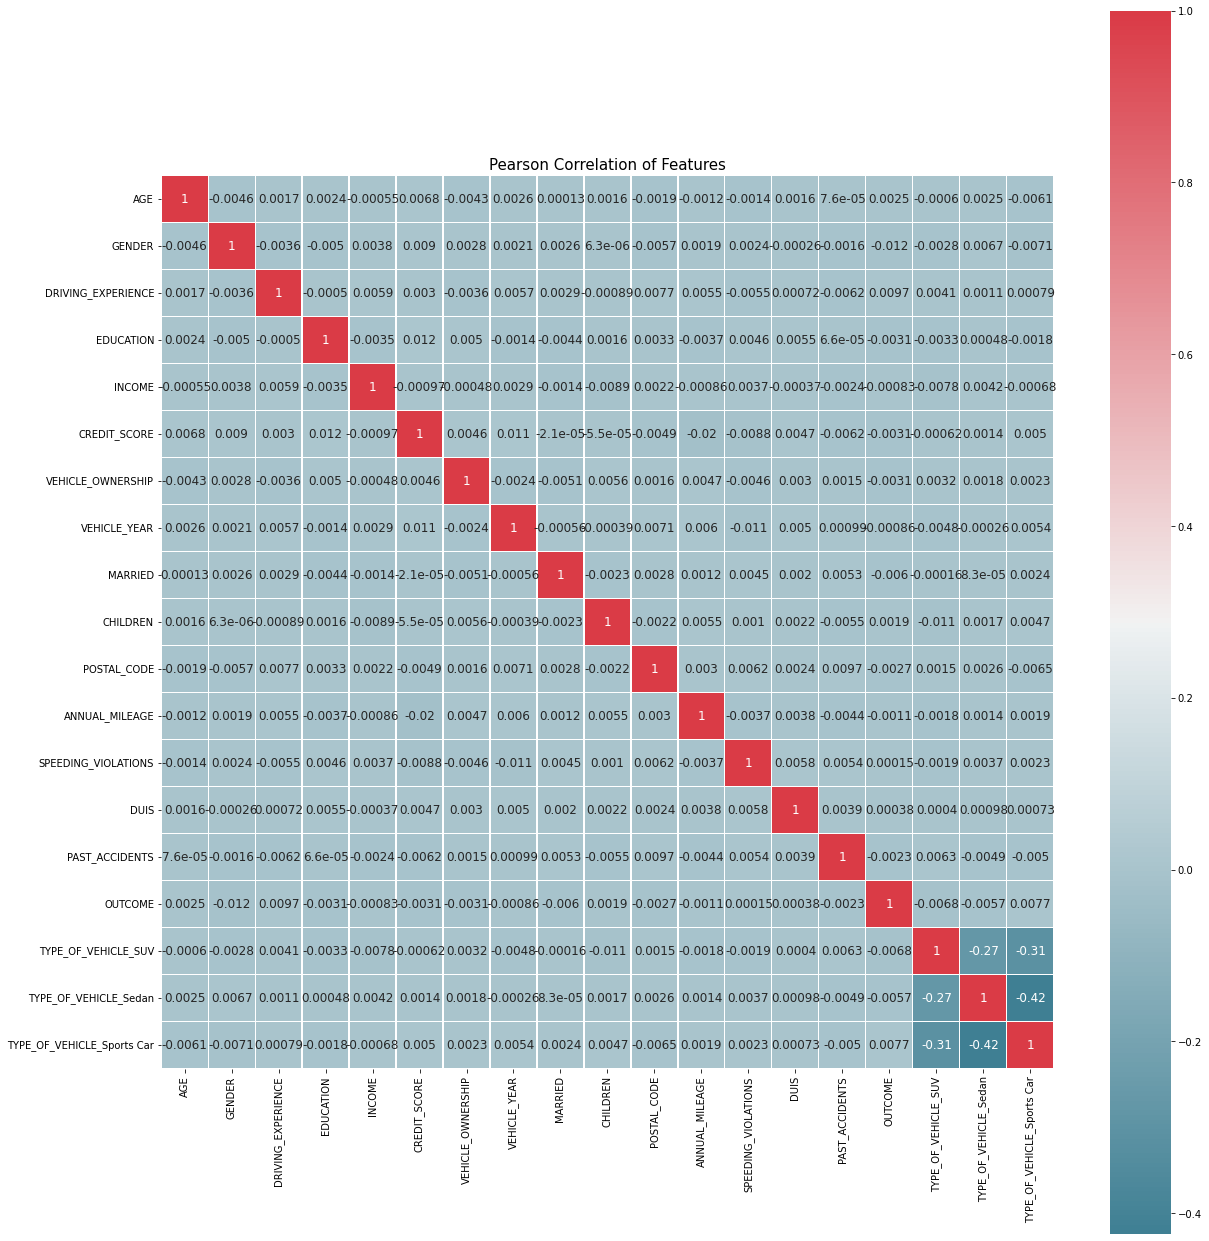

In [ ]:
#https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 25))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_df)

In [18]:
Y_train= train_df['OUTCOME']
train_df.drop('OUTCOME', axis=1,inplace=True)


In [19]:
for dataset in combine:
  dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
for dataset in combine:
  dataset['DRIVING_EXPERIENCE'].fillna(5,inplace=True)

In [ ]:
# for dataset in combine:
#   print(dataset.isnull().sum())

In [ ]:
# sub=pd.read_csv('/content/targetdir/AnalyticsOlympiad2022Data/submission.csv')
# print(sub)

In [27]:
logreg = LogisticRegression()
logreg.fit(train_df, Y_train)
Y_pred_test = logreg.predict(test_df)
Y_pred_train = logreg.predict(train_df)
# acc_log = round(logreg.score(Y_train , Y_pred_train) * 100, 2)
# acc_log

In [31]:
logreg = DecisionTreeClassifier()
logreg.fit(train_df, Y_train)
Y_pred_test = logreg.predict(test_df)
Y_pred_train = logreg.predict(train_df)

In [35]:
logreg = RandomForestClassifier()
logreg.fit(train_df, Y_train)
Y_pred_test = logreg.predict(test_df)
Y_pred_train = logreg.predict(train_df)

In [36]:
a=[]
for ind in range(len(Y_pred_test )):
  if Y_pred_test[ind]==0:
     a.append(0.0)

  else:
     a.append(1.0)

In [37]:
 res=pd.DataFrame({'OUTCOME':a},dtype=np.float32)


In [38]:
res.to_csv('submission3.csv',index=False)

In [ ]:
aa=pd.read_csv('/content/submission2.csv')
print(aa)

       OUTCOME
0          1.0
1          0.0
2          0.0
3          1.0
4          0.0
...        ...
44995      1.0
44996      0.0
44997      1.0
44998      0.0
44999      1.0

[45000 rows x 1 columns]


In [ ]:
from sklearn.metrics import log_loss
print(log_loss(Y_train,Y_pred_train))

9.99200722162641e-16
